##### Afwa Afini - VIE Data Scientist - Kalbe Nutritionals

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# library untuk machine learning model
from sklearn.cluster import KMeans 

In [2]:
df = pd.read_csv('data-source\Dataset CCV 6 - Clustering Model.csv')
df.head()

,id_pelanggan,umur,jenis_kelamin,id_produk,nama_produk,kategori_produk,harga_pembelian
0,1,31,wanita,2,prenagen esensis,woman,54810
1,2,28,wanita,2,prenagen esensis,woman,55539
2,3,21,pria,3,hic1000 vitamin lemon,beverages,55225
3,4,38,pria,6,nutrive benecol,special needs,48295
4,5,42,pria,6,nutrive benecol,special needs,45963


### Exploratory Data Analysis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_pelanggan     50 non-null     int64 
 1   umur             50 non-null     int64 
 2   jenis_kelamin    50 non-null     object
 3   id_produk        50 non-null     int64 
 4   nama_produk      50 non-null     object
 5   kategori_produk  50 non-null     object
 6   harga_pembelian  50 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 2.9+ KB


In [5]:
df.isna().sum()

id_pelanggan       0
umur               0
jenis_kelamin      0
id_produk          0
nama_produk        0
kategori_produk    0
harga_pembelian    0
dtype: int64

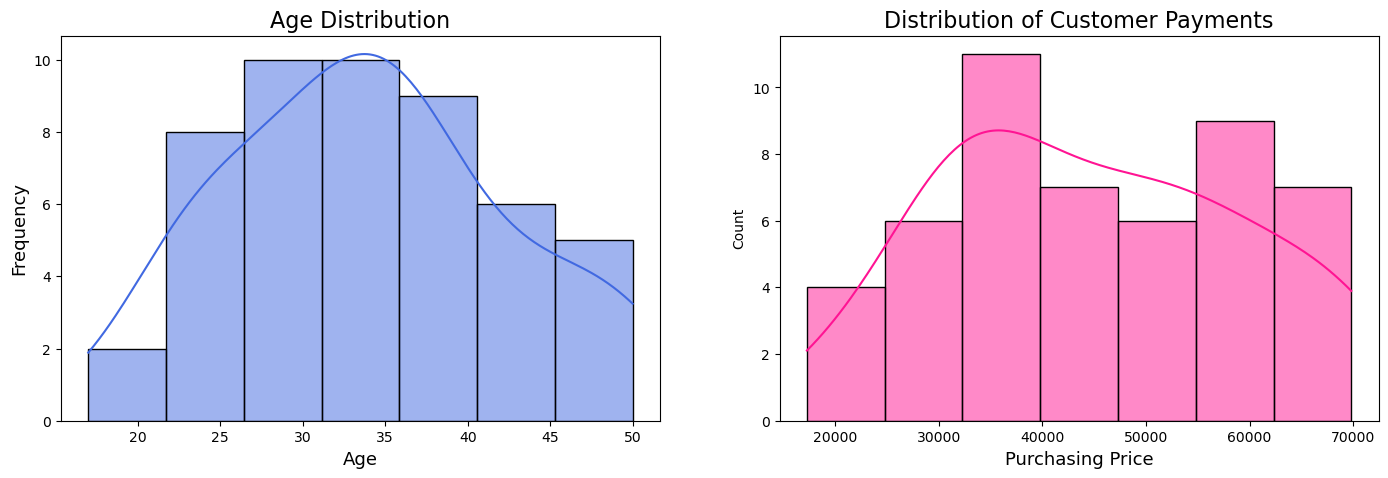

In [15]:
plt.figure(figsize=(17,5))

plt.subplot(1,2,1)
sns.histplot(df['umur'], color='royalblue', kde=True)
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=13)
plt.ylabel('Frequency', fontsize=13)

plt.subplot(1,2,2)
sns.histplot(df['harga_pembelian'], color='deeppink', kde=True)
plt.title('Distribution of Customer Payments', fontsize=16)
plt.xlabel('Purchasing Price', fontsize=13)

plt.show()

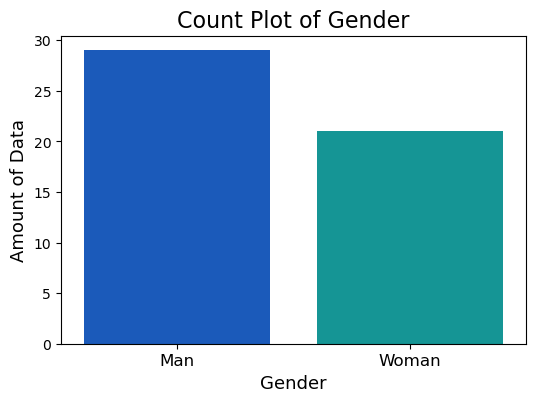

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x='jenis_kelamin', data=df, palette='winter')
plt.title('Count Plot of Gender', fontsize=16)
plt.xlabel('Gender', fontsize=13)
plt.ylabel('Amount of Data', fontsize=13) 
plt.xticks([0,1], ['Man', 'Woman'], fontsize=12)
plt.show()

c:\Users\AfwaAfini\.conda\envs\kalbe_ds\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


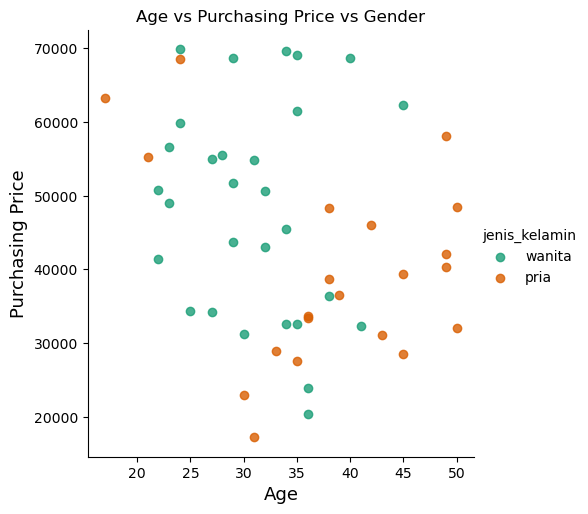

In [21]:
# membuat scatterplot dengan 3 variabel
sns.lmplot(x='umur', y='harga_pembelian', data=df, fit_reg=False, hue='jenis_kelamin', height=5, palette='Dark2')
plt.title('Age vs Purchasing Price vs Gender')
plt.xlabel('Age', fontsize=13)
plt.ylabel('Purchasing Price', fontsize=13)
plt.show()

### K-Means Clustering

In [26]:
# Segmentasi berdasarkan umur dan harga yang dikeluarkan
# Membuat model clustering dengan K = 1 sampai K= 10 untuk
# menentukan K (banyaknya kelompok) yang optimal
X1=df[['umur', 'harga_pembelian']]
wcss=[] #within cluster sum of square
for n in range(1, 11):
    model1=KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=100)
    model1.fit(X1)
    wcss.append(model1.inertia_)
print(wcss)

[10367243957.220001, 2709910312.055195, 1326172182.178728, 799650493.1849623, 442081056.25213677, 271933067.5527777, 200507261.55555552, 137379354.8, 93425809.13333333, 72086028.63333333]


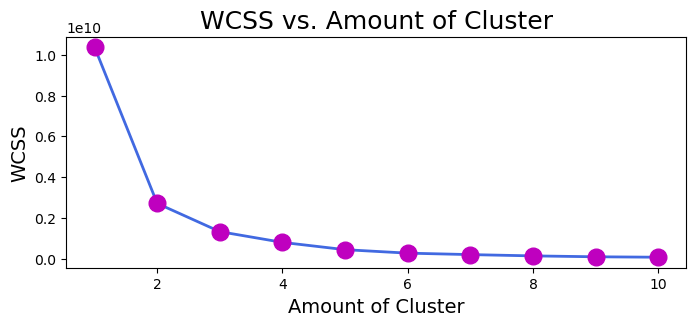

In [27]:
plt.figure(figsize=(8,3))
plt.plot(list(range(1,11)), wcss, color='royalblue', marker='o', linewidth=2, markersize=12, markerfacecolor='m', markeredgecolor='m')
plt.title('WCSS vs. Amount of Cluster', fontsize=18)
plt.xlabel('Amount of Cluster', fontsize=14)
plt.ylabel('WCSS', fontsize=14)
plt.show()

mendapati bahwa K optimal saat K = 3

#### Membuat model clustering dengan K yang optimal

In [30]:
# membangun kembali model clustering dengan K = 3
# melatih model dengan data harga pembelian dan umur pelanggan
model1=KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=100)
model1.fit(X1)
labels1=model1.labels_
centroids1=model1.cluster_centers_

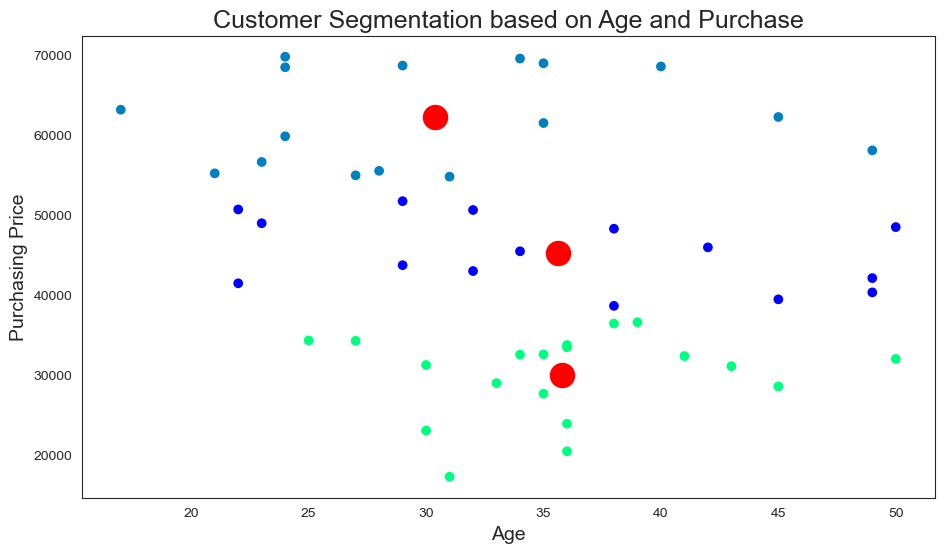

In [29]:
plt.figure(figsize=(11,6))
sns.set_style('white')
plt.scatter(x=df['umur'], y=df['harga_pembelian'], c=labels1, cmap='winter')
plt.scatter(x=centroids1[:,0], y=centroids1[:,1], s=300, c='red')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Purchasing Price', fontsize=14)
plt.title('Customer Segmentation based on Age and Purchase', fontsize=18)
plt.show()